# Neural Network Model 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.datasets import make_blobs
import pandas as pd
import tensorflow as tf
import matplotlib as plt 

In [2]:
soybeans_df = pd.read_csv("Resources/Soybeans.csv") 
soybeans_df 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-09-15,491.00,493.75,490.00,493.75,493.75,445.0
1,2000-09-17,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-09-18,483.25,486.00,482.50,484.00,484.00,382.0
3,2000-09-19,485.00,485.50,483.50,484.25,484.25,325.0
4,2000-09-20,483.50,484.25,483.25,483.25,483.25,321.0
...,...,...,...,...,...,...,...
6269,2021-02-21,NaN,NaN,NaN,NaN,NaN,NaN
6270,2021-02-22,1384.75,1388.50,1371.00,1383.75,1383.75,124120.0
6271,2021-02-23,1383.75,1425.00,1380.75,1406.00,1406.00,88637.0
6272,2021-02-24,1407.25,1426.50,1406.75,1423.75,1423.75,66143.0


In [3]:
soybeans_df = soybeans_df.dropna() 
soybeans_df 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-09-15,491.00,493.75,490.00,493.75,493.75,445.0
2,2000-09-18,483.25,486.00,482.50,484.00,484.00,382.0
3,2000-09-19,485.00,485.50,483.50,484.25,484.25,325.0
4,2000-09-20,483.50,484.25,483.25,483.25,483.25,321.0
5,2000-09-21,486.75,488.00,486.00,486.50,486.50,330.0
...,...,...,...,...,...,...,...
6268,2021-02-19,1376.25,1388.75,1366.50,1377.25,1377.25,140822.0
6270,2021-02-22,1384.75,1388.50,1371.00,1383.75,1383.75,124120.0
6271,2021-02-23,1383.75,1425.00,1380.75,1406.00,1406.00,88637.0
6272,2021-02-24,1407.25,1426.50,1406.75,1423.75,1423.75,66143.0


In [5]:
soybeans_df.rename(columns= {"Adj Close":"Adj_Close"}, inplace= True) 
soybeans_df 

/Users/christopher/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000-09-15,491.00,493.75,490.00,493.75,493.75,445.0
2,2000-09-18,483.25,486.00,482.50,484.00,484.00,382.0
3,2000-09-19,485.00,485.50,483.50,484.25,484.25,325.0
4,2000-09-20,483.50,484.25,483.25,483.25,483.25,321.0
5,2000-09-21,486.75,488.00,486.00,486.50,486.50,330.0
...,...,...,...,...,...,...,...
6268,2021-02-19,1376.25,1388.75,1366.50,1377.25,1377.25,140822.0
6270,2021-02-22,1384.75,1388.50,1371.00,1383.75,1383.75,124120.0
6271,2021-02-23,1383.75,1425.00,1380.75,1406.00,1406.00,88637.0
6272,2021-02-24,1407.25,1426.50,1406.75,1423.75,1423.75,66143.0


In [ ]:
# Drop the non-beneficial columns
#soybeans_df = soybeans_df.drop(columns= ["COLUMN_NAME"], axis= 1) 

In [6]:
# Determine the number of unique values in each column.
soybeans_df.nunique() 

Date         5110
Open         2657
High         2699
Low          2637
Close        2704
Adj_Close    2704
Volume       4152
dtype: int64

In [7]:
soybeans_df.dtypes 

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float64
Volume       float64
dtype: object

In [11]:
# Look at [COLUMN NAME] value counts for binning
#counts = soybeans_df.COLUMN_NAME.value_counts() 
counts = soybeans_df.Volume.value_counts() 
counts 

1.0         43
2.0         22
5.0         18
8.0         14
17.0        13
            ..
1836.0       1
3368.0       1
114907.0     1
718.0        1
78890.0      1
Name: Volume, Length: 4152, dtype: int64

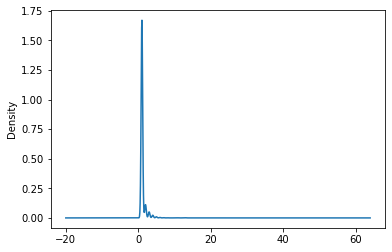

In [12]:
# Visualize the value counts of [COLUMN NAME] 
counts.plot.density() 

In [ ]:
# Determine which values to replace if counts are less than ...?
#replace_application = list(counts[counts < 500].index) 

# Replace in dataframe
#for app in replace_application:
    #soybeans_df.COLUMN_NAME = soybeans_df.COLUMN_NAME.replace(app,"Other")
    
# Check to make sure binning was successful
#soybeans_df.COLUMN_NAME.value_counts() 

In [ ]:
# Look at CLASSIFICATION value counts for binning
#classification_counts = soybeans_df.CLASSIFICATION.value_counts() 
#classification_counts 

In [ ]:
# Visualize the value counts of CLASSIFICATION
#classification_counts.plot.density() 

In [ ]:
# Determine which values to replace if counts are less than ..?
#replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
#for cls in replace_class:
    #soybeans_df.CLASSIFICATION = soybeans_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
#soybeans_df.CLASSIFICATION.value_counts() 

In [ ]:
# Generate our categorical variable lists
categories = ["Date", "Open", "High", "Low", "Close", "Adj_Close", "Volume"] 

In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(soybeans_df[categories])) 

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(categories)
encode_df.head() 

In [ ]:
# Merge one-hot encoded features and drop the originals
soybeans_df = soybeans_df.merge(encode_df, left_index= True, 
                                      right_index= True).drop(columns= categories,axis= 1)
soybeans_df.head()  

In [ ]:
# Split our preprocessed data into our features and target arrays
X = soybeans_df.drop("TARGET_COLUMN_NAME", axis= 1)
y = soybeans_df.TARGET_COLUMN_NAME

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0, stratify= y)  

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test) 

# Train the Neural Network 

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_layer_1 = 80
hidden_layer_2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer_1, activation= "relu",
                             input_dim= number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_layer_2, activation= "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units= 1, activation= "sigmoid")) 

# Check the structure of the model
nn.summary() 

In [ ]:
# Compile the model
nn.compile(loss= "binary_crossentropy", optimizer= "adam", metrics= ["accuracy"]) 

In [ ]:
# Train the model
model = nn.fit(X_train_scaled, y_train, epochs= 100) 

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}") 